In [45]:
# !user/bin/env/python3
# -*- coding: utf-8 -*-
"""
@author: cyy
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data_train = pd.read_csv('E:/kaggle/Titanic/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


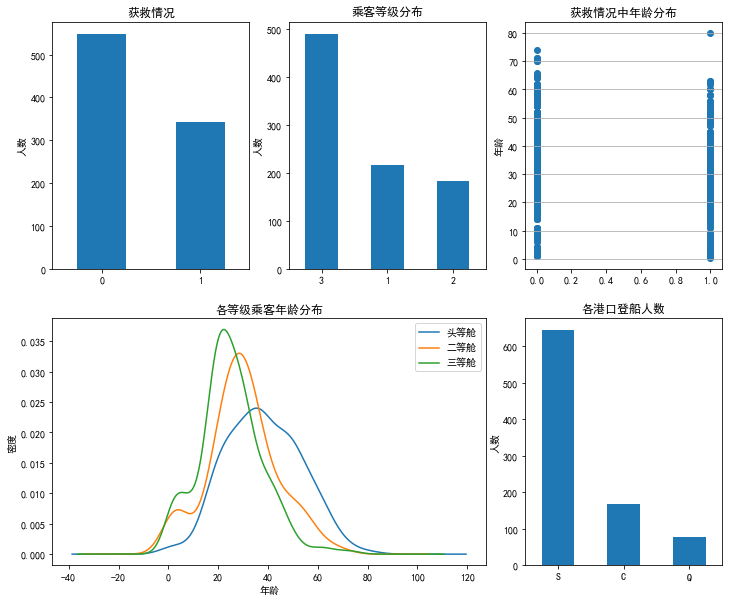

In [5]:
fig = plt.figure(figsize=(12, 10))

plt.subplot2grid((2, 3), (0, 0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title('获救情况')
plt.ylabel('人数')
plt.xticks(rotation=0)

plt.subplot2grid((2, 3), (0, 1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title('乘客等级分布')
plt.ylabel('人数')
plt.xticks(rotation=0)

plt.subplot2grid((2, 3), (0, 2))
plt.scatter(data_train.Survived, data_train.Age)
plt.title('获救情况中年龄分布')
plt.ylabel('年龄')
plt.grid(axis='y')

plt.subplot2grid((2, 3), (1, 0), colspan=2)
data_train[data_train.Pclass == 1].Age.plot(kind='density')
data_train[data_train.Pclass == 2].Age.plot(kind='density')
data_train[data_train.Pclass == 3].Age.plot(kind='density')
plt.xlabel('年龄')
plt.ylabel('密度')
plt.title('各等级乘客年龄分布')
plt.legend(['头等舱', '二等舱', '三等舱'], loc='best')

plt.subplot2grid((2, 3), (1, 2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('各港口登船人数')
plt.ylabel('人数')
plt.xticks(rotation=0)

plt.show()

<Figure size 864x360 with 0 Axes>

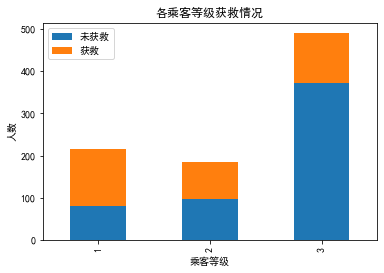

In [6]:
fig = plt.figure(figsize=(12, 5))
survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救': survived_0, '获救': survived_1})
df.plot(kind='bar', stacked=True)
plt.title('各乘客等级获救情况')
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.show()

<Figure size 864x360 with 0 Axes>

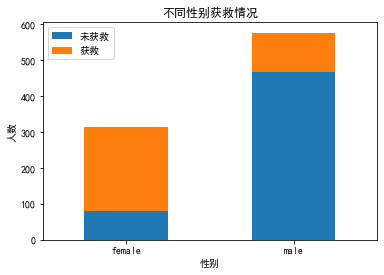

In [7]:
fig = plt.figure(figsize=(12, 5))
survived_0 = data_train.Sex[data_train.Survived == 0].value_counts()
survived_1 = data_train.Sex[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救': survived_0, '获救': survived_1})
df.plot(kind='bar', stacked=True)
plt.title('不同性别获救情况')
plt.xlabel('性别')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

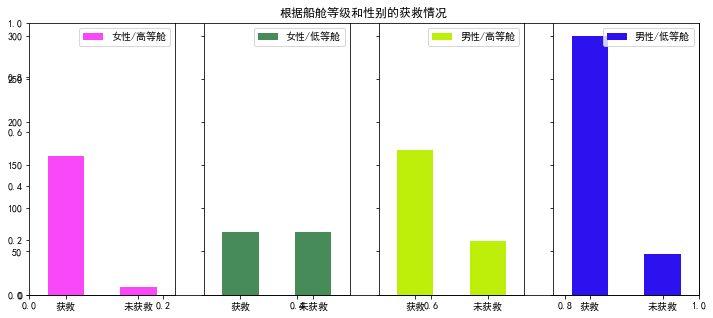

In [8]:
fig = plt.figure(figsize=(12, 5))
plt.title('根据船舱等级和性别的获救情况')

ax1 = fig.add_subplot(141)
data_train.Survived[(data_train.Sex=='female')&(data_train.Pclass!=3)].value_counts().plot(kind='bar', color='#f948f7', label='Female/HighClass')
ax1.set_xticklabels(['获救', '未获救'], rotation=0)
plt.legend(['女性/高等舱'], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
data_train.Survived[(data_train.Sex=='female')&(data_train.Pclass==3)].value_counts().plot(kind='bar', color='#468b58', label='Female/LowClass')
ax2.set_xticklabels(['获救', '未获救'], rotation=0)
plt.legend(['女性/低等舱'], loc='best')

ax3 = fig.add_subplot(143, sharey=ax1)
data_train.Survived[(data_train.Sex=='male')&(data_train.Pclass!=3)].value_counts().plot(kind='bar', color='#bdef0a', label='Male/HighClass')
ax3.set_xticklabels(['获救', '未获救'], rotation=0)
plt.legend(['男性/高等舱'], loc='best')

ax4 = fig.add_subplot(144, sharey=ax1)
data_train.Survived[(data_train.Sex=='male')&(data_train.Pclass==3)].value_counts().plot(kind='bar', color='#2c12ef', label='Male/LowClass')
ax4.set_xticklabels(['获救', '未获救'], rotation=0)
plt.legend(['男性/低等舱'], loc='best')

<Figure size 864x360 with 0 Axes>

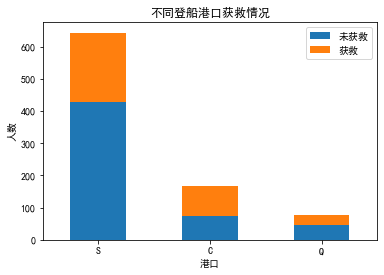

In [9]:
fig = plt.figure(figsize=(12, 5))
survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'未获救': survived_0, '获救': survived_1})
df.plot(kind='bar', stacked=True)
plt.title('不同登船港口获救情况')
plt.xlabel('港口')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

In [10]:
groupby_sib = data_train.groupby(['SibSp', 'Survived'])
df = groupby_sib['PassengerId'].count()
print(df)

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64


In [11]:
groupby_parch = data_train.groupby(['Parch', 'Survived'])
df = groupby_parch['PassengerId'].count()
print(df)

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64


In [12]:
data_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
C49            1
C82            1
D11            1
E50            1
C47            1
Name: Cabin, Length: 147, dtype: int64

<Figure size 864x360 with 0 Axes>

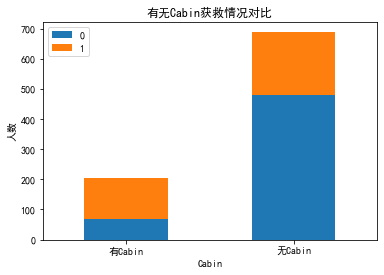

In [13]:
fig = plt.figure(figsize=(12, 5))
survived_cabin = data_train.Survived[data_train.Cabin.notnull()].value_counts()
survived_noncabin = data_train.Survived[data_train.Cabin.isnull()].value_counts()
df = pd.DataFrame({'有Cabin': survived_cabin, '无Cabin': survived_noncabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title('有无Cabin获救情况对比')
plt.xlabel('Cabin')
plt.ylabel('人数')
plt.xticks(rotation=0)
plt.show()

In [14]:
def set_missing_age(df):
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    y = known_age.iloc[:, 0]
    X = known_age.iloc[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    pred_age = rfr.predict(unknown_age.iloc[:, 1:])
    df.loc[df.Age.isnull(), 'Age'] = pred_age
    return df, rfr

In [15]:
data_train, rfr = set_missing_age(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
def set_cabin_type(df):
    df.loc[df.Cabin.notnull(), 'Cabin'] = 'Yes'
    df.loc[df.Cabin.isnull(), 'Cabin'] = 'No'  # 不能调换顺序
    return df

In [17]:
data_train = set_cabin_type(data_train)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


In [19]:
dummies_cabin = pd.get_dummies(data_train.Cabin, prefix='Cabin')
dummies_embarked = pd.get_dummies(data_train.Embarked, prefix='Embarked')
dummies_sex = pd.get_dummies(data_train.Sex, prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train.Pclass, prefix='Pclass')
df = pd.concat([data_train, dummies_cabin, dummies_embarked, dummies_sex, dummies_Pclass], axis=1)
df = df.drop(['Pclass', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis=1)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


In [20]:
scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df.Age.values.reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(df.Fare.values.reshape(-1, 1))
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337


In [21]:
train_df = df.drop(['PassengerId', 'Age', 'Fare'], axis=1)
train_np = train_df.values
y = train_np[:, 0]
X = train_np[:, 1:]
clf = LogisticRegression(solver='liblinear', C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [22]:
data_test = pd.read_csv('E:/kaggle/Titanic/test.csv')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [23]:
data_test.loc[data_test.Fare.isnull(), 'Fare'] = 0
tmp_df = data_test[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[tmp_df.Age.isnull()]
X = null_age.iloc[:, 1:]
predited_age = rfr.predict(X)
data_test.loc[data_test.Age.isnull(), 'Age'] = predited_age

In [24]:
data_test = set_cabin_type(data_test)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [25]:
dummies_cabin = pd.get_dummies(data_test.Cabin, prefix='Cabin')
dummies_embarked = pd.get_dummies(data_test.Embarked, prefix='Embarked')
dummies_sex = pd.get_dummies(data_test.Sex, prefix='Sex')
dummies_pclass = pd.get_dummies(data_test.Pclass, prefix='Pclass')
df_test = pd.concat([data_test, dummies_cabin, dummies_embarked, dummies_pclass, dummies_sex], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [26]:
df_test['Age_scaled'] = scaler.fit_transform(df_test.Age.values.reshape(-1, 1))
df_test['Fare_scaled'] = scaler.fit_transform(df_test.Fare.values.reshape(-1, 1))
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,0,1,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1,1,0,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,0,1,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,0,1,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1,1,0,-0.641199,-0.416740


In [27]:
test = df_test.drop(['PassengerId', 'Age', 'Fare'], axis=1)
test = test.iloc[:, [0, 1, 2, 3, 4, 5, 6, 10, 11, 7, 8, 9, 12, 13]]
predictions = clf.predict(test.values)
result = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
result

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [28]:
pd.DataFrame({'variable': train_df.columns[1:], 'coef': clf.coef_.flatten()})

,variable,coef
0,SibSp,-0.344236
1,Parch,-0.104916
2,Cabin_No,0.000000
3,Cabin_Yes,0.902106
4,Embarked_C,0.000000
5,Embarked_Q,0.000000
6,Embarked_S,-0.417263
7,Sex_female,1.956570
8,Sex_male,-0.677422
9,Pclass_1,0.341161


In [29]:
clf = LogisticRegression(solver='liblinear', C=1, penalty='l1', tol=1e-6)
all_data = df.drop(['PassengerId', 'Age', 'Fare'], axis=1)
X = all_data.iloc[:, 1:]
y = all_data.iloc[:, 0]
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [30]:
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=1)
train_df = split_train.drop(['PassengerId', 'Age', 'Fare'], axis=1)
clf = LogisticRegression(solver='liblinear', penalty='l1', C=1, tol=1e-6)
clf.fit(train_df.iloc[:, 1:], train_df.iloc[:, 0])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

In [31]:
cv_df = split_cv.drop(['PassengerId', 'Age', 'Fare'], axis=1)
predictions = clf.predict(cv_df.iloc[:, 1:])

In [32]:
origin_data_train = pd.read_csv('E:/kaggle/Titanic/train.csv')
bad_cases = origin_data_train.loc[origin_data_train.PassengerId.isin(split_cv.loc[cv_df.iloc[:, 0] != predictions].PassengerId)]
bad_cases.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


In [33]:
learning_curve(clf, X, y, n_jobs=1, train_sizes=np.linspace(.05, 1., 20), verbose=0)

(array([ 29,  59,  89, 118, 148, 178, 207, 237, 267, 296, 326, 356, 386,
        415, 445, 475, 504, 534, 564, 594]),
 array([[0.89655172, 0.86206897, 0.86206897],
        [0.89830508, 0.89830508, 0.89830508],
        [0.88764045, 0.84269663, 0.84269663],
        [0.83898305, 0.8559322 , 0.8559322 ],
        [0.82432432, 0.81756757, 0.81756757],
        [0.82022472, 0.84269663, 0.84269663],
        [0.80676329, 0.83091787, 0.83091787],
        [0.81434599, 0.81434599, 0.81434599],
        [0.81273408, 0.81273408, 0.81273408],
        [0.80405405, 0.7972973 , 0.80405405],
        [0.80981595, 0.79447853, 0.80368098],
        [0.8258427 , 0.80337079, 0.81741573],
        [0.81606218, 0.79792746, 0.81865285],
        [0.81686747, 0.79759036, 0.80722892],
        [0.8247191 , 0.80449438, 0.80674157],
        [0.82105263, 0.80210526, 0.80210526],
        [0.81150794, 0.8015873 , 0.79960317],
        [0.81273408, 0.80524345, 0.79962547],
        [0.81737589, 0.80851064, 0.80141844],
        

In [43]:
def plot_learning_curve(estimator, X, y, title, cv=None, n_jobs=1, train_sizes=np.linspace(0.05, 1, 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    if plot:
        fig = plt.figure(figsize=(12, 5))
        plt.title(title)
        plt.xlabel('训练样本数')
        plt.ylabel('得分')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='训练集得分')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='测试集得分')
        plt.fill_between(train_sizes, train_scores_mean-train_scores_std, train_scores_mean+train_scores_std, color='blue', alpha=0.1)
        plt.fill_between(train_sizes, test_scores_mean-test_scores_std, test_scores_mean+test_scores_std, color='red', alpha=0.1)
        plt.legend(loc='best')
        plt.show()
    midpoint = ((train_scores_mean[-1]+train_scores_std[-1]) + (test_scores_mean[-1]-test_scores_std[-1]))/2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

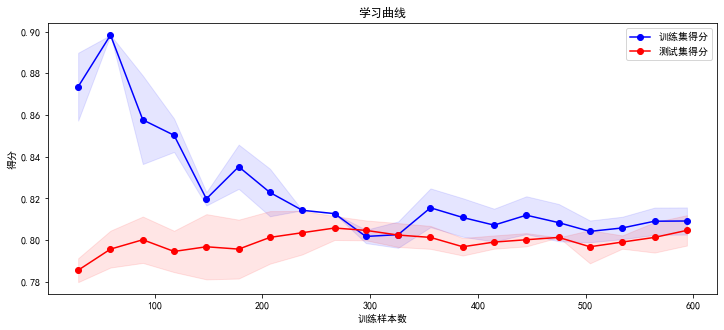

(0.8065696844854024, 0.018258876711338634)

In [44]:
plot_learning_curve(clf, X, y, '学习曲线')

In [49]:
X = train_np[:, 1:]
y = train_np[:, 0]
clf = LogisticRegression(solver='liblinear', C=1, tol=1e-6, penalty='l1')
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_features=1, max_samples=0.8, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

BaggingRegressor(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='warn',
                                                   n_jobs=None, penalty='l1',
                                                   random_state=None,
                                                   solver='liblinear',
                                                   tol=1e-06, verbose=0,
                                                   warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1,
                 max_samples=0.8, n_estimators=20, n_jobs=-1, oob_score=False,
                 random_state=None, verbose=0, warm_

In [72]:
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions.round(0)})
result.head(20)

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,0.0
9,901,0.0
